Post processing file for 1 D flame.
Do change species name for multiple schemes

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('Results/Al_original_BFER_800.csv')
selected_columns = data[['Points_0', 'Velocity_Magnitude', 'Temperature', 'Density'] + [f'Mass_fraction_{i}' for i in range(6)]]
column_mapping = {
    'Points_0': 'grid',
    'Velocity_Magnitude': 'velocity',
    'Temperature': 'T',
    'Density': 'density'
}
column_mapping.update({f'Mass_fraction_{i}': f'Y_{element}' for i, element in enumerate(['O2', 'H2O', 'CH4', 'CO', 'CO2', 'N2'])})
selected_columns = selected_columns.rename(columns=column_mapping)

selected_columns.to_csv('Results/Alborz-BFER_800.csv', index=False)

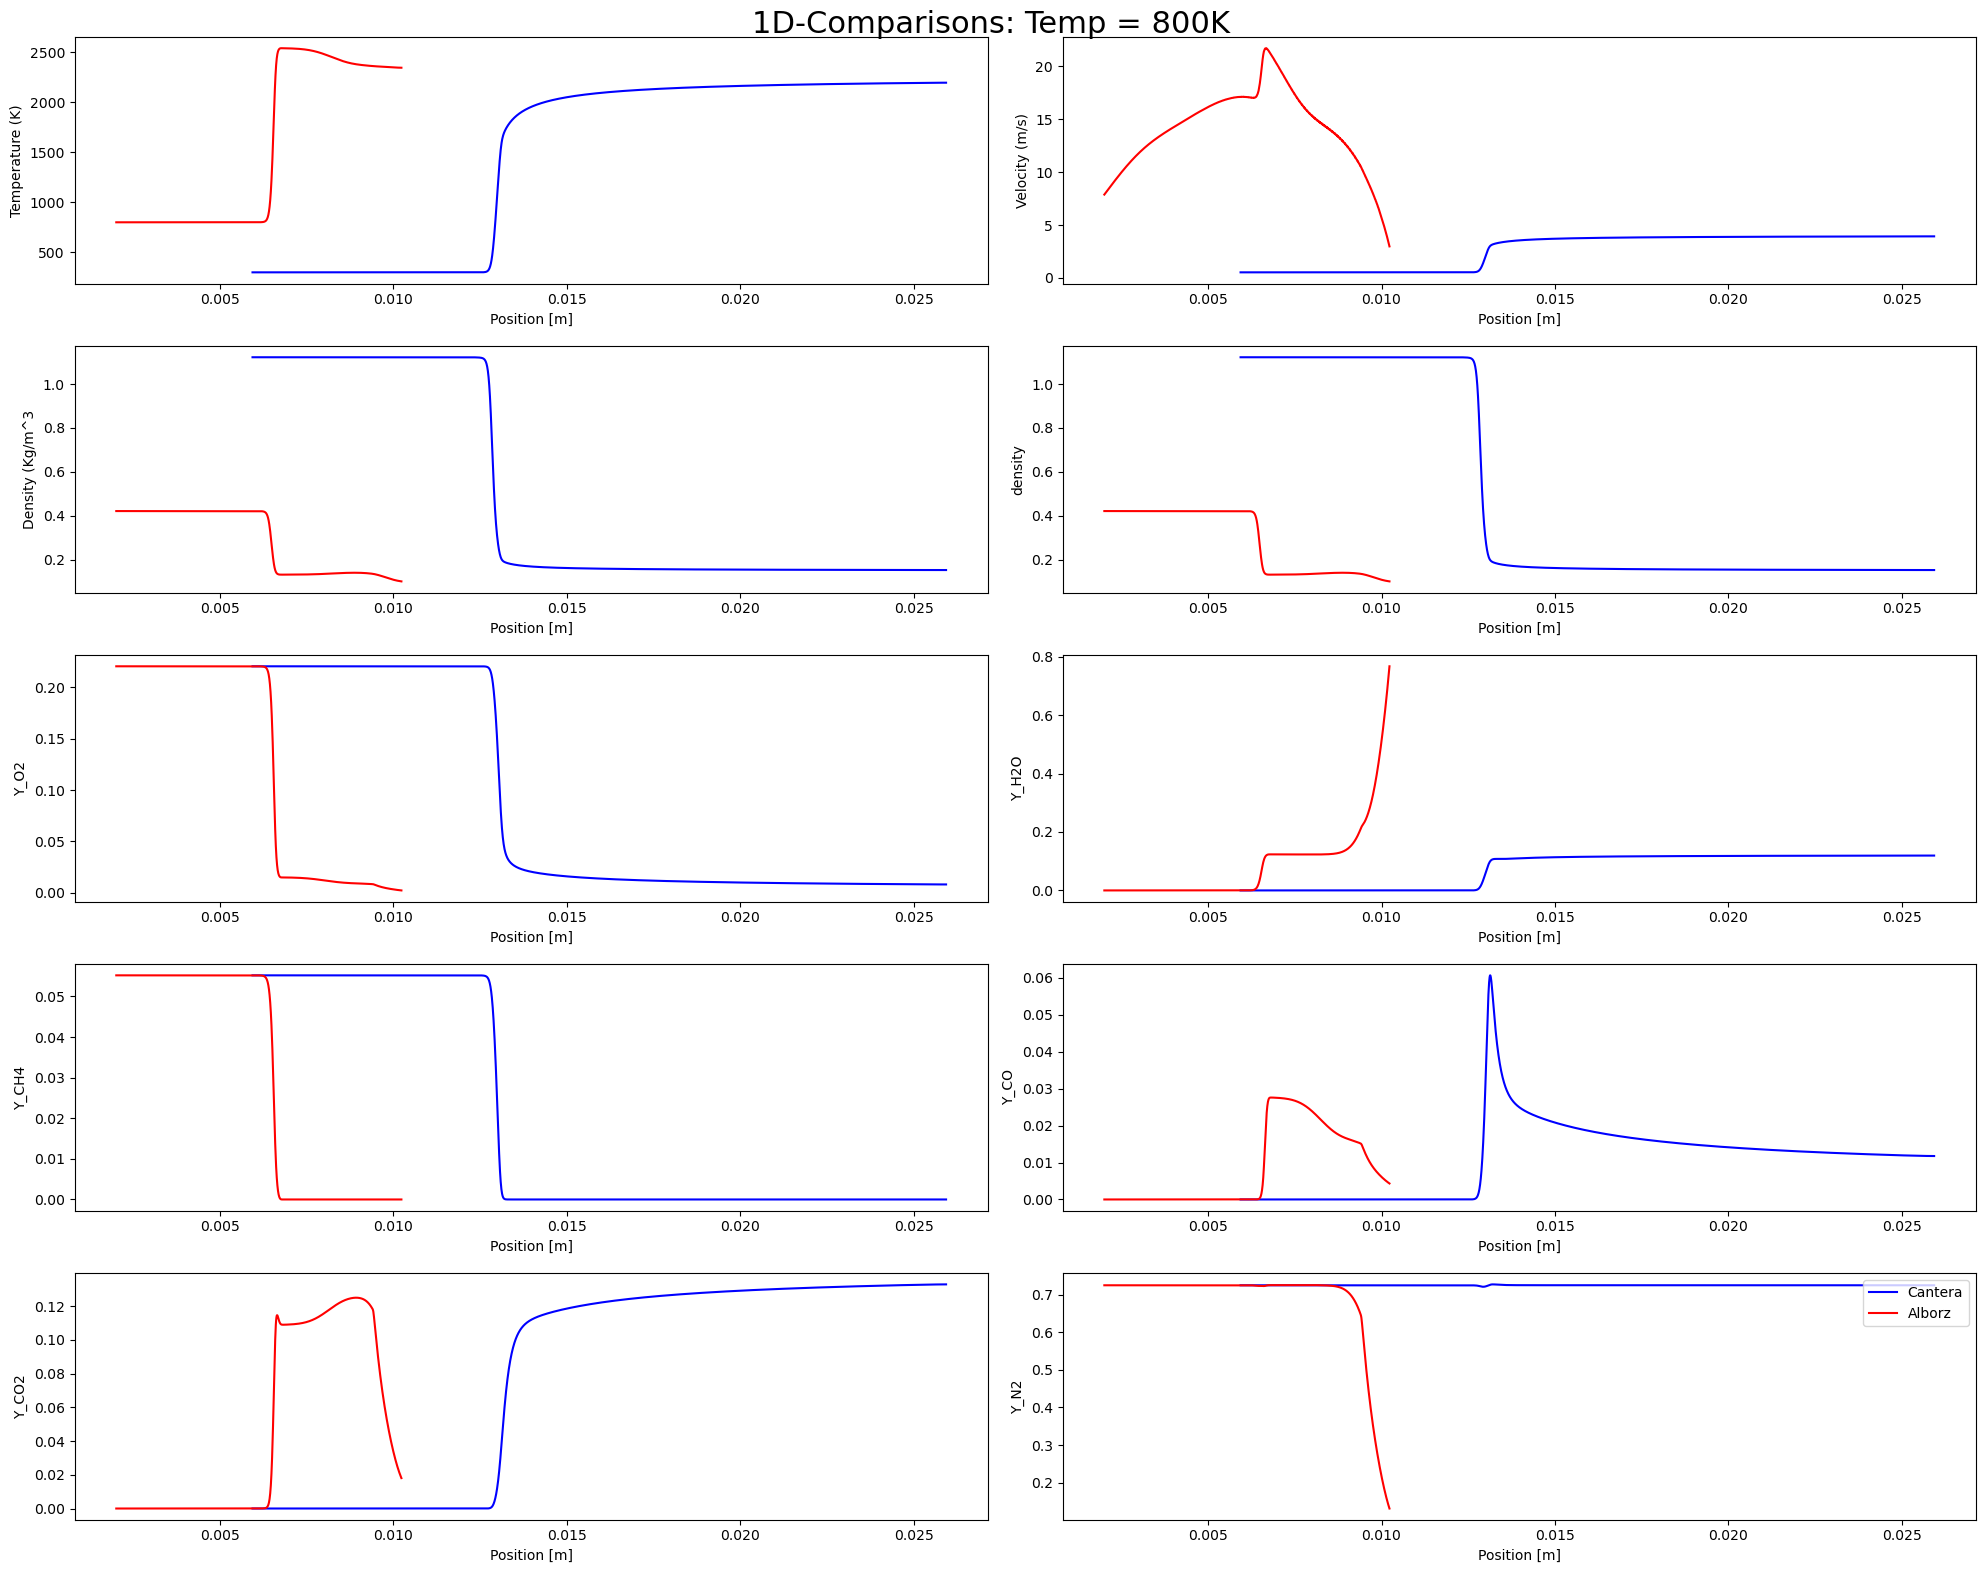

In [2]:
Temp = 800
data_path_cantera = 'Results/Cantera_BFER_800_data.csv'
data_path_alborz = 'Results/Alborz-BFER_800.csv'

# Read data from CSV files
data1 = pd.read_csv(data_path_cantera, delimiter=',')  # Assuming the delimiter is a tab
data2 = pd.read_csv(data_path_alborz, delimiter=',')  # Assuming the delimiter is a tab

things_to_plot = ['grid', 'velocity', 'T', 'density', 'Y_O2', 'Y_H2O', 'Y_CH4', 'Y_CO', 'Y_CO2', 'Y_N2']
num_to_plot = len(things_to_plot)
num_rows = int(np.ceil(num_to_plot / 2))
num_cols = min(2, num_to_plot)

# Create subplots
fig_total = plt.figure(figsize=(20, 16))
plt.clf()

# Plot Temperature
plt.subplot(num_rows, num_cols, 1)
plt.plot(data1['grid'], data1['T'], 'b-')
plt.plot(data2['grid'], data2['T'], 'r-')
plt.xlabel('Position [m]')
plt.ylabel('Temperature (K)')

# Plot Velocity
plt.subplot(num_rows, num_cols, 2)
plt.plot(data1['grid'], data1['velocity'], 'b-')
plt.plot(data2['grid'], data2['velocity'], 'r-')
plt.xlabel('Position [m]')
plt.ylabel('Velocity (m/s)')

# Plot Density
plt.subplot(num_rows, num_cols, 3)
plt.plot(data1['grid'], data1['density'], 'b-')
plt.plot(data2['grid'], data2['density'], 'r-')
plt.xlabel('Position [m]')
plt.ylabel('Density (Kg/m^3')

# Plot species data
for j, species_name in enumerate(things_to_plot[3:]):  # Skip the first three elements (temperature, velocity, density)
    plt.subplot(num_rows, num_cols, j + 4)  # j + 4 to account for the temperature, velocity, density subplots
    plt.plot(data1['grid'], data1[species_name], 'b-')
    plt.plot(data2['grid'], data2[species_name], 'r-')
    plt.xlabel('Position [m]')
    plt.ylabel(species_name)

plt.legend(loc='upper right', labels=['Cantera', 'Alborz'])
# Save or display the entire Figure
fig_total.suptitle(f'1D-Comparisons: Temp = {Temp}K', fontsize=22)
plt.tight_layout()
plt.savefig(f'Results/1D_Comparison_{Temp}.png', dpi=300)
plt.show()


In [ ]:
Cp = 1264.45
R = 8.314  
MolarMass = 28.97  # Molar mass of the gas (g/mol)

grid_cantera = data1['grid']
temperature_cantera = data1['T']

grid_alborz = data2['grid']
temperature_alborz = data2['T']

# Calculate heat release for Cantera
# You may need to adjust the specific heat and molar mass for your actual gas
q_cantera = -Cp * MolarMass * (temperature_cantera[0]-temperature_cantera) / 1000  # Convert to kJ/kg

# Calculate heat release for Alborz
q_alborz = -Cp * MolarMass * (temperature_alborz[0] - temperature_alborz) / 1000  # Convert to kJ/kg

# Plot the heat release
plt.figure(figsize=(10, 6))
plt.plot(grid_cantera, q_cantera, label='Cantera Heat Release')
plt.plot(grid_alborz, q_alborz, label='Alborz Heat Release')
plt.xlabel('Position [m]')
plt.ylabel('Heat Release (kJ/kg)')
plt.legend()
plt.title('Heat Release vs. Position')
plt.grid(True)

In [ ]:
#heat release rate
import numpy as np
import matplotlib.pyplot as plt

# Example data (you need to replace these with your actual data)
num_species = 6  # Number of species
h_of = np.random.rand(num_species)  # Heat of formation for each species (J/mol)
production_rate = np.random.rand(num_species)  # Production rate of each species (mol/s)
stoichiometric_coefficients = np.random.rand(num_species)  # Stoichiometric coefficients
Q_m = 1.0  # Molar flow rate of fuel (mol/s)
Q_1 = 1.0  # Some constant related to your process (e.g., heat of reaction per mole of fuel)

# Calculating the heat release rate
heat_release_rate = -Q_1 * np.sum(h_of * production_rate * stoichiometric_coefficients)

# Assuming you have a range of conditions (like different temperatures) to calculate this for,
# you would loop over those conditions and store the results in a list or array.

# Example plotting (assuming you have a range of data)
# temperatures = np.linspace(300, 1000, 100)  # Example range of temperatures
# heat_release_rates = [calculate_heat_release_rate(temp) for temp in temperatures]

# plt.plot(temperatures, heat_release_rates)
# plt.xlabel('Temperature (K)')
# plt.ylabel('Heat Release Rate (W)')
# plt.title('Heat Release Rate vs Temperature')
# plt.show()


In [ ]:
# Import necessary libraries
import pandas as pd

# Load the CSV file
df = pd.read_csv('Results/Alborz-BFER_800.csv')

reference_temperature = 800 
percent_of_temperature_rise = 0.9  

temperature_rise = df['T'] - reference_temperature

# Find the position where the temperature reaches 90% of T'
threshold_temperature = reference_temperature + percent_of_temperature_rise * temperature_rise.max()
flame_thickness_position = df.loc[df['T'] >= threshold_temperature, 'grid'].iloc[0]

# Calculate flame thickness
flame_thickness = flame_thickness_position - df.loc[df['T'] == reference_temperature, 'grid'].iloc[0]

# Calculate heat release rate per unit length
# Note: You'll need additional data like density, cross-sectional area, specific heat, flame speed for a complete calculation
# HRR = rho * A * cp * T' * u'

# Display results
print(f'Flame Thickness: {flame_thickness} units')
print(f'Temperature Rise due to Combustion (T\'): {temperature_rise.max()} units')

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

file_path = "D:/2_Cantera/Python_files/1D/Alborz_Results/Alborz_Results/debug/temp_monitor.dat"
data = np.loadtxt(file_path, delimiter='\t')

# Extract data into separate arrays
x = data[:, 0]
time = data[:, 1]
temp = data[:, 2]

# Create the plot
plt.figure(figsize=(8, 6))
#plt.plot(x, time, label='Physical Time (s)', color='blue', linestyle='-', marker='o')
plt.plot(x, temp, label='Temperature (K)', color='red')
plt.xlabel('Time Iterations')
plt.ylabel('Temperature')
plt.title('Temperature vs Iteration')
plt.legend()
plt.grid(True)

# Customize the legend location
plt.legend(loc='upper right')
plt.show()